<a href="https://colab.research.google.com/github/juijeong8324/AI/blob/ubuntu/yolov4/yolov4_customDataset_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Aug 26 12:00:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# YOLO v4모델로 colab에서 객체인식(Object detection)

### YOLOv3또는 Yolov4모델을 데이터로 학습 시킬 때는 보통 GPU가 내장된 컴퓨터로 진행을 많이 한다. 그러나, GPU가 내장된 PC가 없다고 딥러닝 모델을 학습하지 못할까? Colab으로도 이와같은 학습이 가능하다.(기왕이면 조금 금액을 지불하더라도 Colab Pro로 진행하는 것을 권장한다.)

**실행 환경**  
**1. colab (Pro)**  
**2. darknet(tensorflow나 pytorch와 같은 딥러닝 프레임워크)**  
**3. YOLO v4 (딥러닝 모델)**


참고로 아래와 같이 진행할 경우 YOLO v3모델도 이와같이 실행할 수 있다.

### 이 내용을 설명하는 관련 참조 글의 링크는 다음과 같다.  
 (https://medium.com/@techzizou007/training-a-custom-detector-for-mask-detection-using-yolov4-darknet-61a659d4868)

### 1. Colab Runtime메뉴에서 Change runtime type을 선택한다. 
### 2. hardware accelator로 GPU를 선택한다.

### 구글 드라이브 마운트

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
import os 

path = "/content/drive/MyDrive/Advanced_AI/yolov4"
#만약에 path로 설정된 폴더가 존재하지 않으면
if not os.path.isdir(path):                                                           
    os.mkdir(path)
    print('mkdir'+path)
else:
    print('이미 폴더가 존재합니다.')

이미 폴더가 존재합니다.


In [ ]:
# 아래 PATH는 WEIGHT파일을 저장할 폴더이다.
path = "/content/drive/MyDrive/Advanced_AI/yolov4/training"
if not os.path.isdir(path):                                                           
    os.mkdir(path)
    print('mkdir'+path)
else:
    print('이미 폴더가 존재합니다.')

이미 폴더가 존재합니다.


### 구글 드라이브의 경로를 간단하게 접근하기 위해 /mydrive로 심볼릭 링크를 설정한다.

In [ ]:
# 리눅스에서 SOFT LINK는 바로가기 아이콘과 같은 폴더를 생성
!ln -s /content/drive/MyDrive/ /mydrive

In [ ]:
# 현재 WORKING디렉토리를 아래 폴더로 이동
%cd /mydrive/Advanced_AI/yolov4

/content/drive/MyDrive/Advanced_AI/yolov4


In [ ]:
# 현재 내가 작업하는 working dir가 어디인지 확인
# 리눅스 티미널 명령
!pwd

/content/drive/MyDrive/Advanced_AI/yolov4


In [ ]:
path = '/mydrive/Advanced_AI/yolov4/darknet'
if not os.path.isdir(path):
    # yolo v4의 github에서 소스코드를 복제(다운로드), 나의 구글 드라이브에...
    !git clone https://github.com/AlexeyAB/darknet
    print('git clone is done!')
else:
    print("이미 git으로부터 파일을 다운로드 했습니다")

이미 git으로부터 파일을 다운로드 했습니다


In [ ]:
%cd /mydrive/Advanced_AI/yolov4/darknet/

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


In [ ]:
!ls

3rdparty		 darknet_video.py	predictions.jpg
backup			 data			process.py
build			 image_yolov3.sh	__pycache__
build.ps1		 image_yolov4.sh	README.md
cfg			 include		results
chart.png		 json_mjpeg_streams.sh	scripts
chart_yolov4-custom.png  libdarknet.so		src
cmake			 LICENSE		uselib
CMakeLists.txt		 Makefile		vcpkg.json
darknet			 net_cam_v3.sh		video_yolov3.sh
DarknetConfig.cmake.in	 net_cam_v4.sh		video_yolov4.sh
darknet_images.py	 obj			weights
darknet.py		 photo.jpg		yolov4.conv.137


### Makefile의 내용을 수정합니다.

In [ ]:
%cd /mydrive/Advanced_AI/yolov4/

/content/drive/MyDrive/Advanced_AI/yolov4


In [ ]:
# GPU가 있으면... Makefile을 아래와 같이 수정
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/My Drive/Advanced_AI/yolov4/darknet


In [ ]:
# 문서 파일의 내용을 화면에 직접 출력
!cat Makefile

GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# GeForce RTX 3070, 3080, 3090
# ARCH= -gencode arch=compute_86,code=[sm_86,compute_86]

# Kepler GeForce GTX 770, GTX 760, GT 740
# ARCH= -gencode arch=compute_30,code=sm_30

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[sm_80,compute_80]

# Tesla V100
# ARCH= -gencode arch=compute_7

In [ ]:
import os
# 현재 colab에서 최대로 사용 가능한 cpu core수 확인하기
os.cpu_count()

2

In [ ]:
# '-j'뒤의 숫자는 make시 활용할 cpu 코어 갯수를 의미한다.
!make -j2

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/http_stream.cpp -o obj/http_stream.o
Makefile:182: recipe for target 'obj/image_opencv.o' failed
make: *** [obj/image_opencv.o] Interrupt
^C


In [ ]:
%cd /mydrive/Advanced_AI/yolov4/darknet/

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


In [ ]:
# darknet, libdarknet.so파일이 보이면
# 컴파일이 잘 된것이다.
!ls

3rdparty		 darknet_video.py	predictions.jpg
backup			 data			process.py
build			 image_yolov3.sh	__pycache__
build.ps1		 image_yolov4.sh	README.md
cfg			 include		results
chart.png		 json_mjpeg_streams.sh	scripts
chart_yolov4-custom.png  libdarknet.so		src
cmake			 LICENSE		uselib
CMakeLists.txt		 Makefile		vcpkg.json
darknet			 net_cam_v3.sh		video_yolov3.sh
DarknetConfig.cmake.in	 net_cam_v4.sh		video_yolov4.sh
darknet_images.py	 obj			weights
darknet.py		 photo.jpg		yolov4.conv.137


## 여기까지 진행하면 YOLO v4를 위한 darknet(딥러닝 프레임워크)이 준비

## 사용자 데이터셋을 준비
마스크를 쓴 이미지  
마스크를 쓰지 않은 이미지

In [ ]:
# 마스크를 쓴 이미지, 쓰지 않은 이미지를 여기 폴더에 넣기위해
path = '/mydrive/Advanced_AI/yolov4/darknet/data/customData'
if not os.path.isdir(path):
    os.mkdir(path)
    print(path+'폴더를 생성했습니다')
else:
    print("이미 폴더가 존재합니다")

이미 폴더가 존재합니다


In [ ]:
!pwd

/content/drive/My Drive/Advanced_AI/yolov4/darknet


In [ ]:
# path = '/mydrive/Advanced_AI/yolov4/darknet/data/customData'
# print(len(os.listdir(path)))

# 압축풀기
#!unzip /mydrive/Advanced_AI/yolov4/darknet/data/customData/rock.zip -d data/customData
#!unzip /mydrive/Advanced_AI/yolov4/darknet/data/customData/scissors.zip -d data/customData
!unzip /mydrive/Advanced_AI/yolov4/darknet/data/customData/paper.zip -d data/customData

Archive:  /mydrive/Advanced_AI/yolov4/darknet/data/customData/paper.zip
  inflating: data/customData/br1_1.png  
  inflating: data/customData/br1_2.png  
  inflating: data/customData/br1_3.png  
  inflating: data/customData/br1_4.png  
  inflating: data/customData/br1_5.png  
  inflating: data/customData/br1_6.png  
  inflating: data/customData/br1_7.png  
  inflating: data/customData/br1_8.png  
  inflating: data/customData/br1_9.png  
  inflating: data/customData/br1_10.png  
  inflating: data/customData/br1_11.png  
  inflating: data/customData/br1_12.png  
  inflating: data/customData/br1_13.png  
  inflating: data/customData/br1_14.png  
  inflating: data/customData/br1_15.png  
  inflating: data/customData/br1_16.png  
  inflating: data/customData/br1_17.png  
  inflating: data/customData/br1_18.png  
  inflating: data/customData/br1_19.png  
  inflating: data/customData/br1_20.png  
  inflating: data/customData/br1_21.png  
  inflating: data/customData/br1_22.png  
  inflating: 

In [ ]:
# 압축푼 폴더로 이동하여
%cd /mydrive/Advanced_AI/yolov4/darknet/data/customData

/content/drive/MyDrive/Advanced_AI/yolov4/darknet/data/customData


In [ ]:
#파일 압축푼것 확인
!ls

'스크린샷, Audio - 100_sc.png'	 br2_22_sc.png	      'im Audio - 29.png'
'스크린샷, Audio - 100_sc.txt'	 br2_22_sc.txt	      'im Audio - 29.txt'
'스크린샷, Audio - 101_sc.png'	 br2_22.txt	      'im Audio - 2.png'
'스크린샷, Audio - 101_sc.txt'	 br2_230.png	      'im Audio - 2.txt'
'스크린샷, Audio - 102_sc.png'	 br2_230_sc.png       'im Audio - 300.png'
'스크린샷, Audio - 102_sc.txt'	 br2_230_sc.txt       'im Audio - 300.txt'
'스크린샷, Audio - 103_sc.png'	 br2_230.txt	      'im Audio - 301.png'
'스크린샷, Audio - 103_sc.txt'	 br2_231.png	      'im Audio - 301.txt'
'스크린샷, Audio - 104_sc.png'	 br2_231_sc.png       'im Audio - 302.png'
'스크린샷, Audio - 104_sc.txt'	 br2_231_sc.txt       'im Audio - 302.txt'
'스크린샷, Audio - 105_sc.png'	 br2_231.txt	      'im Audio - 303.png'
'스크린샷, Audio - 105_sc.txt'	 br2_232.png	      'im Audio - 303.txt'
'스크린샷, Audio - 106_sc.png'	 br2_232_sc.png       'im Audio - 307.png'
'스크린샷, Audio - 106_sc.txt'	 br2_2

### custom dataset을 위해   
### "custom.data", "yolov4-custom.cfg", "custom.names" 파일을 수정하고 yolov4 폴더에 업로드한다.

그리고 process.py파일을 yolov4폴더로 업로드한다.

In [ ]:
%cd /mydrive/Advanced_AI/yolov4/darknet

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


### 데이터셋 생성하기

### **yolov4-custom.cfg파일 설정**
**[Training]**   
**batch=64**로 설정한다.<br> 그러나, 데이터셋의 **이미지 크기가 클 경우**,<br> batch=32나 16으로 줄여야 할 수도 있다.  <br><br>
**max_batches**는 본인 데이터의 클래스 갯수 * (2000 or 3000)
<br>
(mat_batches는 데이터셋의 특성에 따라 달라질 
수 있다.)
<br><br>
**steps**는 max_batches*0.8,  max_batches*0.9로 설정.
<br><br>
**filter**는 [yolo]의 바로 앞의 있는 filter크기만 수정한다. filter의 계산식은 다음과 같다.
(classes+5)*3, 클래스가 2인경우 (2+5)*3=21이다.
<br><br>
**classes**는 [yolo]에 있는 classes만 수정해준다.

<br><br>

**[Inference]**  
테스트를 위해서는 batch=1로 설정한다.<br>


데이터셋을 준비한 뒤 process.py를 실행한다.
process.py파일은 데이터셋을 train과 test의 비율을 9:1로 나누어준다.

#### process.py파일을 실행하면 data폴더안에 train.txt와 test.txt파일을 생성해준다.

In [ ]:
# data폴더에 train.txt와 test.txt파일을 만들어준다.
# train.txt파일은 학습에 사용되고,
# test.txt 파일은 validation에 사용된다.
#!python process.py

In [ ]:
import glob, os

# Current directory
#current_dir = os.path.dirname(os.path.abspath('/mydrive/Advanced_AI/yolov4/darknet/data/'))

#print(current_dir)

current_dir = 'data/customData'

# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('data/train.txt', 'w')
file_test = open('data/test.txt', 'w')

# Populate train.txt and test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.png")):
    #print(pathAndFilename)
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    if counter == index_test:
        counter = 1
        file_test.write("data/customData" + "/" + title + '.png' + "\n")
    else:
        file_train.write("data/customData" + "/" + title + '.png' + "\n")
        counter = counter + 1

In [ ]:
!ls data/

9k.tree       dog.jpg		    imagenet.shortnames.list  test.txt
coco9k.map    eagle.jpg		    labels		      train.txt
coco.names    giraffe.jpg	    maskData		      voc.names
custom.data   goal.txt		    openimages.names
customData    horses.jpg	    person.jpg
custom.names  imagenet.labels.list  scream.jpg


### 생성된 train.txt파일의 내용을 한번 확인해보자

In [ ]:
!cat data/train.txt

data/customData/br2_189_sc.png
data/customData/r_br2_128.png
data/customData/r_br2_131.png
data/customData/br2_194_sc.png
data/customData/br2_193_sc.png
data/customData/br2_191_sc.png
data/customData/br2_192_sc.png
data/customData/r_br2_132.png
data/customData/br2_196_sc.png
data/customData/r_br2_134.png
data/customData/br2_197_sc.png
data/customData/br2_198_sc.png
data/customData/r_br2_133.png
data/customData/br2_201_sc.png
data/customData/br2_203_sc.png
data/customData/br2_200_sc.png
data/customData/br2_199_sc.png
data/customData/br2_202_sc.png
data/customData/r_br2_136.png
data/customData/r_br2_137.png
data/customData/br2_207_sc.png
data/customData/br2_208_sc.png
data/customData/br2_205_sc.png
data/customData/br2_204_sc.png
data/customData/br2_206_sc.png
data/customData/r_br2_138.png
data/customData/br2_210_sc.png
data/customData/br2_209_sc.png
data/customData/br2_211_sc.png
data/customData/r_br2_140.png
data/customData/br2_212_sc.png
data/customData/br2_215_sc.png
data/customData/b

### pre-trained yolov4 weight파일을 다운로드 하자.

In [ ]:
# yolo v4를 ms coco데이터셋에 사전학습된 파일 
# 현재 경로 위치가 /content/gdrive/My Drive/Advanced_AI/yolov4/darknet에 다운로드
if not os.path.isfile('yolov4.conv.137'):
    !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
else:
    print('이미 파일이 존재합니다')

이미 파일이 존재합니다


In [ ]:
!pwd

/content/drive/My Drive/Advanced_AI/yolov4/darknet


### 학습 진행하기

In [ ]:
!ls -al

total 595676
drwx------ 2 root root      4096 Aug  6 16:52 3rdparty
drwx------ 2 root root      4096 Aug 16 06:39 backup
drwx------ 2 root root      4096 Aug  6 16:52 build
-rw------- 1 root root     27008 Aug  6 16:52 build.ps1
drwx------ 3 root root      4096 Aug 23 11:22 cfg
drwx------ 2 root root      4096 Aug  6 16:52 .circleci
drwx------ 2 root root      4096 Aug  6 16:52 cmake
-rw------- 1 root root     24576 Aug  6 16:52 CMakeLists.txt
-rw------- 1 root root   6587336 Aug 23 03:38 darknet
-rw------- 1 root root      1406 Aug  6 16:52 DarknetConfig.cmake.in
-rw------- 1 root root      9469 Aug  6 16:52 darknet_images.py
-rw------- 1 root root      8207 Aug  6 16:52 darknet.py
-rw------- 1 root root      6747 Aug  6 16:52 darknet_video.py
drwx------ 4 root root      4096 Aug  6 16:52 data
drwx------ 2 root root      4096 Aug  6 16:52 .github
-rw------- 1 root root       686 Aug  6 16:52 .gitignore
-rw------- 1 root root       110 Aug  6 16:52 image_yolov3.sh
-rw------- 1 root roo

In [ ]:
# darknet파일의 실행권한 설정
# 7  111 -> rwx   110 -> rw-
!chmod 700 darknet

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/custom.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.835110), count: 25, class_loss = 0.869457, iou_loss = 3.357959, total_loss = 4.227416 
 total_bbox = 2398740, rewritten_bbox = 0.000167 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.588463), count: 4, class_loss = 0.989335, iou_loss = 6.938859, total_loss = 7.928195 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.839655), count: 12, class_loss = 0.851908, iou_loss = 8.645761, total_loss = 9.497669 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.877229), count: 25, class_loss = 1.244634, iou_loss = 2.242483, total_loss = 3.487117 
 total_bbox = 2398781, rewritten_bbox = 0.000167 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.695790), count: 1, class_loss = 0.266629, iou_loss = 1.334908, total_loss = 1.601538 
v3 (iou loss

## **Colab의 Session을 유지하기 위해서는 아래의 코드를 추가해 주자.**
웹브라우저에서 (Ctrl + Shift + i)키를 입력하면 창이 뜬다.  
console탭으로 이동해서 아래의 코드를 추가 해주자.

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


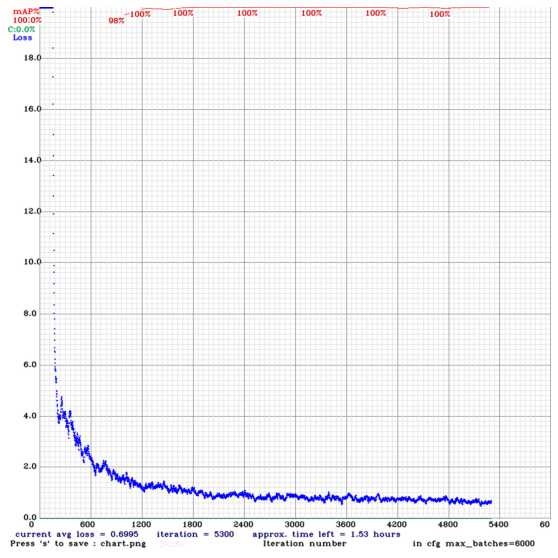

In [ ]:
%cd /mydrive/Advanced_AI/yolov4/darknet/

#only works if the training does not get interrupted
imShow('chart.png')

In [ ]:
!pwd

/content/drive/My Drive/Advanced_AI/yolov4/darknet


# 학습이 중단된 경우 아래 코드 실행

### 학습 도중 colab세션이 끊겼을 때 이어서 학습을 진행하려면 다시 구글 드라이브를 마운트 하고 학습을 진행한다.

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/MyDrive/ /mydrive

%cd /mydrive/Advanced_AI/yolov4/darknet/

!chmod 700 darknet

/content/drive/My Drive/Advanced_AI/yolov4
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link '/mydrive/MyDrive': File exists
/content/drive/MyDrive/Advanced_AI/yolov4/darknet


### 이어서 학습을 진행할 때는  yolov4.conv.137파일 대신, 가장 마지막까지 학습을 했던 weights파일명을 적어준다.

In [ ]:
!./darknet detector train data/custom.data cfg/yolov4-custom.cfg ../training/yolov4-custom_last.weights -dont_show -map

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,

In [ ]:
!ls -al

total 179732
drwx------ 2 root root      4096 Aug  6 16:52 3rdparty
drwx------ 2 root root      4096 Aug  6 16:58 backup
drwx------ 2 root root      4096 Aug  6 16:52 build
-rw------- 1 root root     27008 Aug  6 16:52 build.ps1
drwx------ 2 root root      4096 Aug  6 16:52 cfg
-rw------- 1 root root     92684 Aug  7 01:04 chart.png
-rw------- 1 root root     92684 Aug  7 01:04 chart_yolov4-custom.png
drwx------ 2 root root      4096 Aug  6 16:52 .circleci
drwx------ 2 root root      4096 Aug  6 16:52 cmake
-rw------- 1 root root     24576 Aug  6 16:52 CMakeLists.txt
-rwx------ 1 root root   6587336 Aug  6 17:00 darknet
-rw------- 1 root root      1406 Aug  6 16:52 DarknetConfig.cmake.in
-rw------- 1 root root      9469 Aug  6 16:52 darknet_images.py
-rw------- 1 root root      8207 Aug  6 16:52 darknet.py
-rw------- 1 root root      6747 Aug  6 16:52 darknet_video.py
drwx------ 2 root root      4096 Aug  6 16:52 data
drwx------ 2 root root      4096 Aug  6 16:52 .git
drwx------ 2 root

## 학습된 weight파일을 테스트해보자

### 학습에 맞춰 설정했던 설정을 테스트 조건으로 변경하자.


In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/Advanced_AI/yolov4/darknet/cfg
/content/drive/My Drive/Advanced_AI/yolov4/darknet


In [ ]:
!pwd

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


In [ ]:
%cd /mydrive/Advanced_AI/yolov4/darknet/

/content/drive/MyDrive/Advanced_AI/yolov4/darknet


In [ ]:
# weight파일 복사 (구글 드라이브에서 colab서버로 파일을 가져오기) (원래는 best인데유ㅠㅠㅠ)
!cp /mydrive/Advanced_AI/yolov4/training/yolov4-custom_best.weights weights/

In [ ]:
!./darknet detector test data/custom.data cfg/yolov4-custom.cfg weights/yolov4-custom_best.weights /mydrive/Advanced_AI/mask_test_images/image1.jpg -thresh 0.5 

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

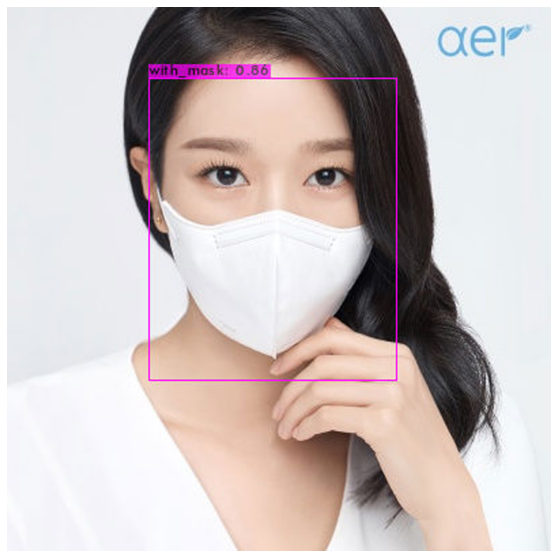

In [ ]:
imShow('predictions.jpg')

### PC의 웹캠을 연결하고 웹캡의 영상을 colab으로 전송하여 사진을 촬영하고, 결과를 확인해보자.

<IPython.core.display.Javascript object>

Saved to photo.jpg


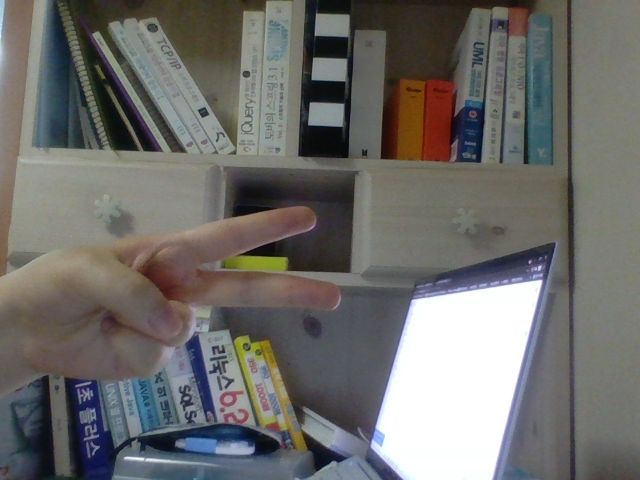

In [ ]:
#run detector on images captured by webcam for your custom YOLOv4 trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pwd

/content/drive/My Drive/Advanced_AI/yolov4/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


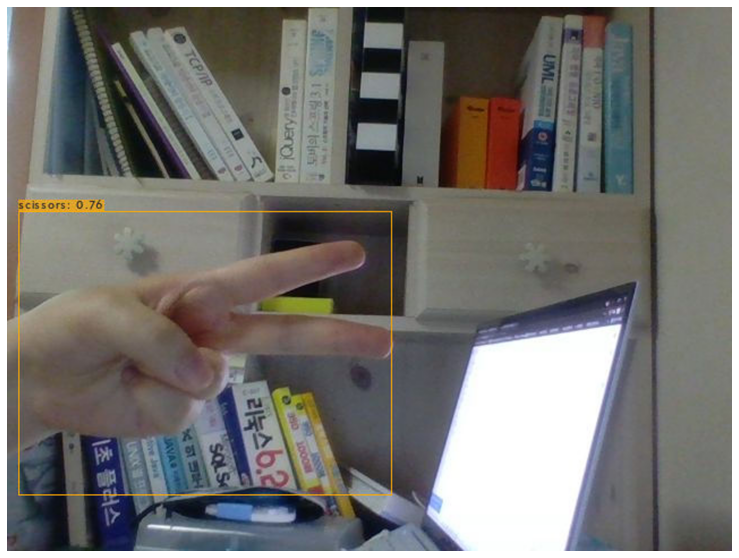

In [ ]:
!./darknet detector test data/custom.data cfg/yolov4-custom.cfg /mydrive/Advanced_AI/yolov4/training/yolov4-custom_best.weights photo.jpg -thresh 0.5
imShow('predictions.jpg')

### 웹캠의 라이브 영상을 사용하여 객체인식하기

In [ ]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
# Adjusted for my custom YOLOv4 trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-custom.cfg", "data/custom.data", "/mydrive/Advanced_AI/yolov4/training/yolov4-custom_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes   

<IPython.core.display.Javascript object>

참조사이트  
https://github.com/techzizou/yolov4-custom_Training

In [ ]:
!pwd

/content/gdrive/My Drive/Advanced_AI/yolov4/darknet
